In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [2]:
playlist_id = 'spotify:playlist:31ncBxcoGHB9lTbAEly5xR'
playlist = sp.user_playlist(username, playlist_id, fields="name, tracks, next")
playlist_name = playlist['name']
playlist_name

'OpenBroadcast - Good Vibes (by baxter)'

In [3]:
tracks = []
audio_features = []
tracks_paging_object = playlist['tracks']
while True:
    track_id_list = []
    for item in tracks_paging_object['items']:
        track_result = item['track']
        track = {
            'id': track_result['id'],
            'name': track_result['name'],
            'artist_id': track_result['artists'][0]['id'],
            'artist_name': track_result['artists'][0]['name'],
            'popularity': track_result['popularity'],
        }
        tracks.append(track)
        track_id_list.append(track['id'])
    audio_features.extend(sp.audio_features(track_id_list))
    if not tracks_paging_object['next']:
        break
    tracks_paging_object = sp.next(tracks_paging_object)
print(len(tracks), "tracks in playlist")
print(len(audio_features), "tracks in audio_features")

462 tracks in playlist
462 tracks in audio_features


In [4]:
tracks_df = pd.DataFrame(tracks)
audio_features_df = pd.DataFrame(audio_features)

df = tracks_df.merge(audio_features_df, on='id')
df = df.drop(columns=['analysis_url', 'track_href', 'type', 'uri'])
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000
mean,21.221116,0.698625,0.565115,5.256972,-9.959476,0.464143,0.072823,0.344030,0.257797,0.157214,0.684610,112.209301,2.512570e+05,3.946215
std,17.796390,0.127952,0.169311,3.479008,3.268447,0.499210,0.067655,0.283675,0.331706,0.124819,0.216803,25.729316,9.635231e+04,0.314480
min,0.000000,0.241000,0.041500,0.000000,-26.094000,0.000000,0.023500,0.000545,0.000000,0.020700,0.036600,37.069000,2.728200e+04,1.000000
25%,5.000000,0.618000,0.447500,2.000000,-11.698250,0.000000,0.038775,0.069200,0.000569,0.089175,0.542750,95.092000,1.938480e+05,4.000000
50%,17.000000,0.717500,0.571000,5.000000,-9.313000,0.000000,0.049350,0.273000,0.040300,0.112000,0.732000,107.398000,2.369800e+05,4.000000
75%,34.000000,0.793500,0.689250,8.000000,-7.704250,1.000000,0.075150,0.586250,0.557250,0.170000,0.855000,120.017500,2.914405e+05,4.000000
max,76.000000,0.979000,0.982000,11.000000,-0.519000,1.000000,0.627000,0.960000,0.981000,0.974000,0.986000,209.186000,1.056067e+06,5.000000


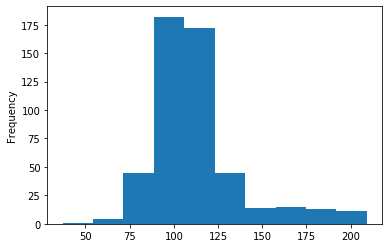

In [5]:
df['tempo'].plot.hist()

<img src="bpm_pace.png" width="600">

In [19]:
# set the BPM range
tempo_min, tempo_max = 120, 130
track_ids = list(df[(df['tempo'] >= tempo_min) & (df['tempo'] <= tempo_max) & (df['danceability'] >= 0.5)]['id'])
len(track_ids)

50

In [20]:
playlist_id, is_new = spotify.get_playlist_by_name(sp, 
        f"Run Test BPM {tempo_min} - {tempo_max}", 
        create_if_none=True)
if playlist_id and is_new:
    print(f"Created new playlist with ID {playlist_id}")
elif playlist_id:
    print(f"Found existing playlist with ID {playlist_id}")
else:
    print("Something went wrong :-(")

Created new playlist with ID 1BfmdmBfylz9Xb9vo7FDNS


In [21]:
num_tracks_added = spotify.add_tracks(sp, playlist_id, track_ids)
num_tracks_added

50

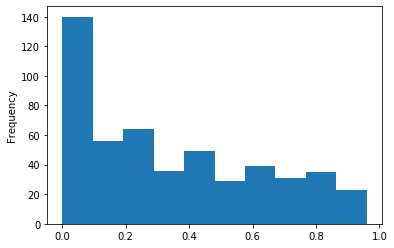

In [6]:
df['acousticness'].plot.hist()

# Get all my public playlists

In [7]:
sp_response = sp.current_user_playlists()
all_playlists = sp_response['items']
while sp_response['next']:
    sp_response = sp.next(sp_response)
    all_playlists.extend(sp_response['items'])
len(all_playlists)

73

In [8]:
own_playlists = list(filter(lambda l: l['owner']['id'] == user['id'], all_playlists))
len(own_playlists)

49

In [9]:
own_playlists_trimmed = [{k: v for k, v in d.items() if k in ['id', 'name', 'public', 'tracks']} for d in own_playlists]
len(own_playlists_trimmed)

49

In [10]:
public_playlists = list(filter(lambda l: (l['public'] == True), own_playlists_trimmed))
len(public_playlists)

17

In [11]:
public_playlists

[{'id': '6u5RL72VpPaJfeLksVLE2Q',
  'name': 'Mellow Jazz',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/6u5RL72VpPaJfeLksVLE2Q/tracks',
   'total': 712}},
 {'id': '7JYdgqlBBhiCqjpx2pVKwf',
  'name': 'KJAH',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/7JYdgqlBBhiCqjpx2pVKwf/tracks',
   'total': 1610}},
 {'id': '4jdHBhEw9a9OBJ0CVbmpFX',
  'name': 'Run',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/4jdHBhEw9a9OBJ0CVbmpFX/tracks',
   'total': 68}},
 {'id': '2MzQi9D9OtFuUsuOS8lwtS',
  'name': 'Power Songs',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/2MzQi9D9OtFuUsuOS8lwtS/tracks',
   'total': 925}},
 {'id': '5ngdqzXvg3v6yakZ6oAcxv',
  'name': 'Trojan Archives',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/5ngdqzXvg3v6yakZ6oAcxv/tracks',
   'total': 749}},
 {'id': '566s1zzyRtF4bzv9JfpnVY',
  'name': 'Pop2000',
  'public': True,
  '